In [1]:
import torch
import numpy as np

## Pytorch basics

In [41]:
# from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"x_data Tensor: \n {x_data} \n")

# from numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"x_np: \n {x_np} \n")

# from another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

x_data Tensor: 
 tensor([[1, 2],
        [3, 4]]) 

x_np: 
 tensor([[1, 2],
        [3, 4]]) 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0695, 0.2149],
        [0.5078, 0.0652]]) 



In [7]:
# use a tuple to define the shape of a tensor
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2410, 0.8157, 0.4724],
        [0.5575, 0.1440, 0.1434]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [8]:
# tensor attributes
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [10]:
# All pytorch operations can be run on GPU
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [13]:
# pytorch uses std numpy-like indexing and slicing
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

#use cat to join tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [38]:
# multiply
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(f"Ist Tensor: \n {tensor} \n")
tensor2 = torch.rand(4,4)
print(f"Random Tensor: \n {tensor2} \n")

# This computes the element-wise product. Give attention to this detail - its "elementwise"
print(f"tensor.mul(tensor2) \n {tensor.mul(tensor2)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor} \n")

# MatMul
print(f"tensor.matmul(tensor) \n {tensor.matmul(tensor)} \n")
print(f"Ist Tensor Transpose: \n {tensor.T} \n")
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

Ist Tensor: 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

Random Tensor: 
 tensor([[0.3044, 0.1995, 0.8691, 0.8257],
        [0.0824, 0.9024, 0.3202, 0.9782],
        [0.0137, 0.9792, 0.2827, 0.3385],
        [0.6817, 0.5757, 0.3672, 0.5324]]) 

tensor.mul(tensor2) 
 tensor([[0.3044, 0.0000, 0.8691, 0.8257],
        [0.0824, 0.0000, 0.3202, 0.9782],
        [0.0137, 0.0000, 0.2827, 0.3385],
        [0.6817, 0.0000, 0.3672, 0.5324]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor.matmul(tensor) 
 tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]]) 

Ist Tensor Transpose: 
 tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
       

In [40]:
# ops with "_" at the end are in-place ops
print(tensor, "\n")
tensor.add_(5)
print(tensor)

# In-place operations save some memory, 
# but can be problematic when computing derivatives because of an immediate loss of history. 
# Hence, their use is discouraged.

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 

tensor([[11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.]])


In [51]:
# Tensors on the CPU and NumPy arrays can share their underlying memory locations, 
# and changing one will change the other.
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

# A change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"\nt: {t}, {t.dtype}")
print(f"n: {n}, {n.dtype}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]

t: tensor([2., 2., 2., 2., 2.]), torch.float32
n: [2. 2. 2. 2. 2.], float32


In [48]:
# numpy to tensor
n = np.ones(5)
t = torch.from_numpy(n)

# change in numpy array reflects in tensor
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}, {n.dtype}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.], float64


## Pytorch autograd tutorial

In [52]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
b
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/suresh/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 116MB/s]


In [53]:
# input to the model
prediction = model(data) # forward pass

In [54]:
# Use to model's prediction to calculate the loss
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [55]:
# Call the optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# Initiate gradient descent
optim.step() #gradient descent

In [62]:
# Differentiation in Autograd

# create a two variable
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
# requires_grad is to tell the autograd to track all changes in that tensor

# Lets define a random equation Q = 3a^2 - b^2. Let this be your error function/equation
Q = 3*a**3 - b**2
# Calling backward on Q will calculate the gradients. See below

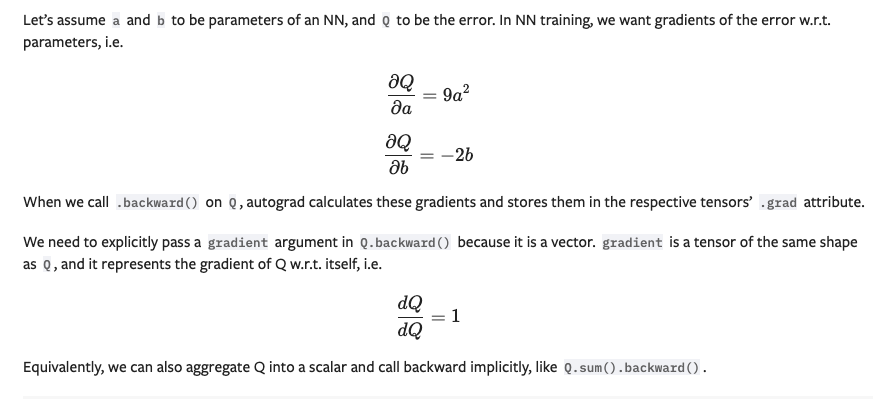

In [63]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

a: tensor([2., 3.], requires_grad=True)


In [64]:
print(f"a grad: {a.grad}")

a grad: tensor([36., 81.])


In [59]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [65]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True
